### 使用KMnist数据集 训练神经网络模型

In [1]:
# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [2]:
# 定义超参数
LR = 1e-3
epochs = 150
BATCH_SIZE = 128

In [3]:
# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True,
                         transform=ToTensor())

d:\Users\helen\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
100%|██████████| 18.2M/18.2M [00:08<00:00, 2.26MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 364kB/s]
100%|██████████| 3.04M/3.04M [00:01<00:00, 2.19MB/s]
100%|██████████| 5.12k/5.12k [00:00<00:00, 2.50MB/s]


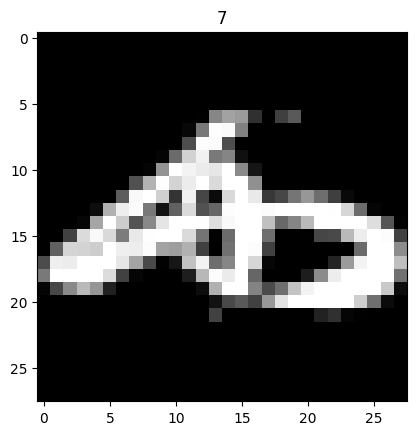

In [4]:
import matplotlib.pyplot as plt

img,label = train_data[1]
img.numpy().shape
plt.imshow(img.numpy().squeeze(), cmap='gray')
plt.title(label)
plt.show()

In [5]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据

In [6]:

# 定义模型
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10)
)

In [7]:

# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [8]:

for epoch in range(epochs):
    # 提取训练数据
    for data, target in trian_dl:
        # 前向运算
        output = model(data.reshape(-1, 784))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        optimizer.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'Epoch:{epoch} Loss: {loss.item()}')

Epoch:0 Loss: 2.2957351207733154
Epoch:1 Loss: 2.275634527206421
Epoch:2 Loss: 2.266314744949341
Epoch:3 Loss: 2.247682809829712
Epoch:4 Loss: 2.2299606800079346
Epoch:5 Loss: 2.2071104049682617
Epoch:6 Loss: 2.184579610824585
Epoch:7 Loss: 2.183314800262451
Epoch:8 Loss: 2.1787686347961426
Epoch:9 Loss: 2.1403753757476807
Epoch:10 Loss: 2.132519006729126
Epoch:11 Loss: 2.0993032455444336
Epoch:12 Loss: 2.0889599323272705
Epoch:13 Loss: 2.049330234527588
Epoch:14 Loss: 2.029479742050171
Epoch:15 Loss: 1.9876502752304077
Epoch:16 Loss: 1.988664150238037
Epoch:17 Loss: 1.9830026626586914
Epoch:18 Loss: 1.955417513847351
Epoch:19 Loss: 1.9081014394760132
Epoch:20 Loss: 1.9211019277572632
Epoch:21 Loss: 1.8576892614364624
Epoch:22 Loss: 1.85973060131073
Epoch:23 Loss: 1.8173094987869263
Epoch:24 Loss: 1.8203482627868652
Epoch:25 Loss: 1.732766032218933
Epoch:26 Loss: 1.7449322938919067
Epoch:27 Loss: 1.6248559951782227
Epoch:28 Loss: 1.5949864387512207
Epoch:29 Loss: 1.5930248498916626
Epo